In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Machine Learning and Data Mining Project: Analysis of Customer Churn

This project encompasses a comprehensive analysis aimed at predicting and understanding customer churn. Our approach involves several key stages:

## Data Exploration
- **Objective**: Gain an in-depth understanding of the dataset's structure, features, and summary statistics.
- **Activities**: Examine the dataset to understand its composition and characteristics.

## Data Preprocessing
- **Objective**: Prepare the data for effective analysis.
- **Activities**: 
  - Clean the dataset by addressing issues such as missing values.
  - Transform the data, including encoding categorical variables and normalizing data, to ensure it is suitable for analysis.

## Feature Selection
- **Objective**: Identify the most impactful features for predicting customer churn.
- **Activities**: Use statistical and machine learning techniques to select features that strongly correlate with customer churn.

## Model Building
We will develop and test various predictive models:

### K-Nearest Neighbors (KNN)
- **Approach**: Build a KNN classifier specifically tailored to predict customer churn.

### Ensemble Methods
- **Approach**: Employ advanced ensemble techniques like Random Forest and Gradient Boosting to enhance the prediction accuracy.

## Model Evaluation
- **Objective**: Assess the performance of our models.
- **Activities**: 
  - Evaluate models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
  - Compare the performance across different models to identify the most effective approach.

## Insights and Recommendations
- **Objective**: Derive actionable insights from our analysis.
- **Activities**: 
  - Interpret the results and insights gained from the model evaluations.
  - Provide strategic recommendations on how to mitigate customer churn based on our findings.


## Part 1: Data Exploration

The first thing we do is merge the datasets into a single dataframe. We then examine the dataset to understand its composition and characteristics. All of our datasets are keyed off the `msno` column, which is a unique identifier for each customer.

In [2]:
# merge the datasets into a unified dataframe
import pandas as pd
from scripts.get_merged_data import get_merged_data
df = get_merged_data()
df.head()


INFO:root:Data merged and saved successfully.


,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,dEPT6Ki6RIimMvKFy2B/iLhNalAIQVvVEznJwqcI5xg=,0,22,35,male,9,20110613,31,0,0,149,1,20151031,20151130,0
1,dEPT6Ki6RIimMvKFy2B/iLhNalAIQVvVEznJwqcI5xg=,0,22,35,male,9,20110613,31,0,0,149,1,20150630,20150731,0
2,dEPT6Ki6RIimMvKFy2B/iLhNalAIQVvVEznJwqcI5xg=,0,22,35,male,9,20110613,31,30,149,149,1,20160229,20160331,0
3,dEPT6Ki6RIimMvKFy2B/iLhNalAIQVvVEznJwqcI5xg=,0,22,35,male,9,20110613,31,30,149,149,1,20160131,20160229,0
4,dEPT6Ki6RIimMvKFy2B/iLhNalAIQVvVEznJwqcI5xg=,0,22,35,male,9,20110613,31,30,149,149,1,20160630,20160731,0


### Data Cleaning

First we'll do some basic data cleaning. We'll check for missing values and remove any duplicate rows.

In [6]:
# Checking for missing values
missing_values = df.isnull().sum()

# Checking for duplicate rows
duplicate_rows = df.duplicated().sum()

# Descriptive statistics for numerical columns
numerical_stats = df.describe()

# print(missing_values)
# print(duplicate_rows)
# print(numerical_stats)
print(df.dtypes)


msno                      object
is_churn                   int64
city                       int64
bd                         int64
gender                    object
registered_via             int64
registration_init_time     int64
payment_method_id          int64
payment_plan_days          int64
plan_list_price            int64
actual_amount_paid         int64
is_auto_renew              int64
transaction_date           int64
membership_expire_date     int64
is_cancel                  int64
dtype: object


There's only 4 duplicate rows, so we'll just remove them. More impactful is that we can see that Gender is missing a significant number of values, so we can address this with a couple strategies:

- Imputation: Imputing the missing gender values might introduce bias or inaccuracies, especially when almost half of the data is missing.
- Categorization as 'Unknown': This approach involves categorizing missing gender values as 'unknown'. It's a safe and common method, allowing the model to acknowledge the presence of unknown data without making assumptions.
- Predictive Modeling: Create a model to predict the missing gender values based on other features.

We'll go with the 'Unknown' approach for now, but we'll revisit this later and see if we can improve our models by predicting the missing values.

Gender's also encoded as a string, so we'll convert it to a binary variable.


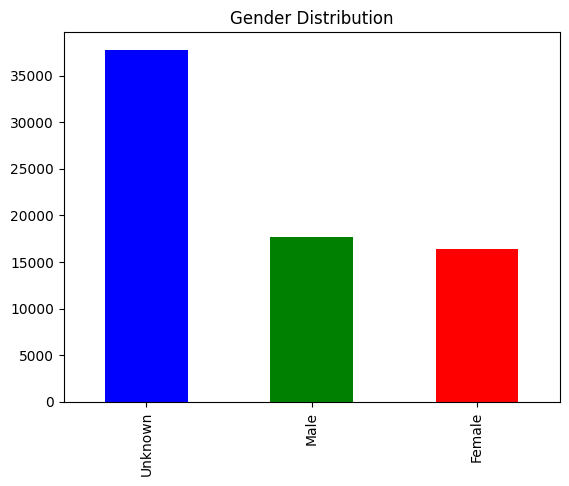

In [26]:
df['gender'] = df['gender'].replace(['female', 'male'], [0, 1]).fillna(-1).astype(int)

# plot gender
gender_counts = df['gender'].value_counts().rename({0: 'Female', 1: 'Male', -1: 'Unknown'})

# Define a color list
colors = ['blue', 'green', 'red']

# Plot the DataFrame with colors
ax = gender_counts.plot(kind='bar', title='Gender Distribution', color=colors)

# Show the plot
plt.show()


Now that we've cleaned up the data, let's take a look at some visualizations to get a better understanding of the data.

### Plot Histograms of Numeric Features

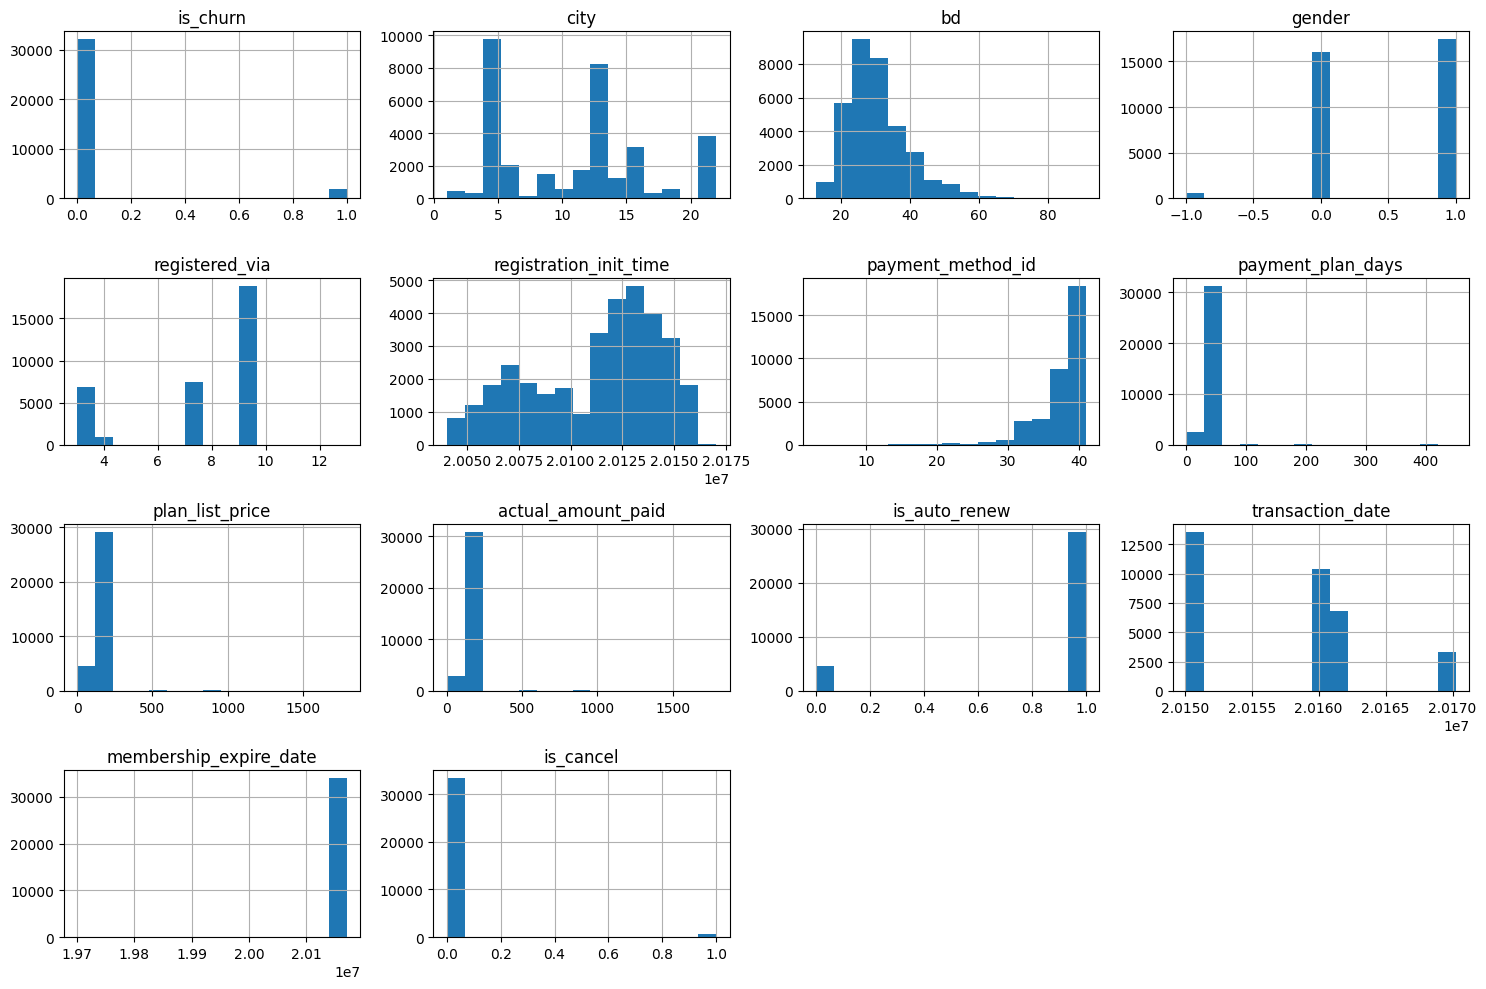

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns (we've converted everything to numeric already)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()


### Initial Data Exploration and Visualization

1. `is_churn` (Target Variable):
The target variable shows a significant class imbalance, which is common in churn prediction problems. In practice, the number of customers who stay with the service (non-churn) often outweighs those who leave (churn). We'll have to carefully manage this during the model training process to ensure that the model does not become biased toward predicting the majority class.

2. `bd` (Age):
The age distribution with its peaks and a notable number of zeros suggests potential data quality issues or a representation of missing/unreported data. Age can be a significant factor in churn prediction, as user engagement and preferences can vary widely across different age groups. We'll clean this up right now by removing the outliers and zeros.


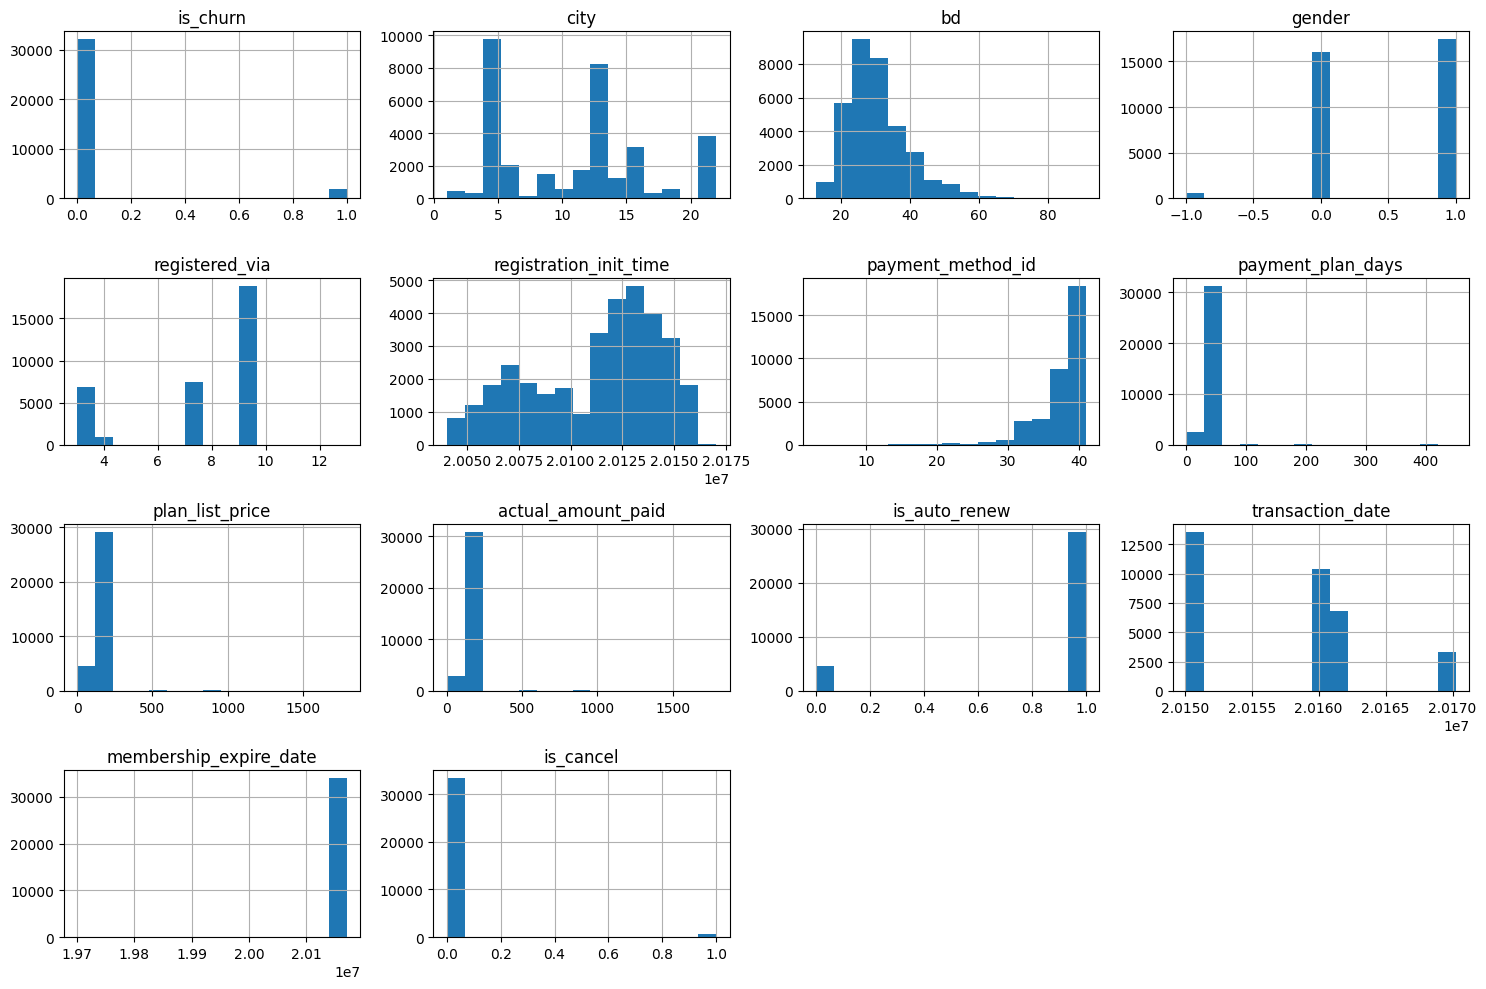

In [31]:
# remove outliers and zeros from `bd` column
df = df[(df['bd'] > 0) & (df['bd'] < 100)]

# replot histogram
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()


3. `payment_plan_days` and `actual_amount_paid`: Both features show specific peaks which indicate common payment plans and amounts. These financial features are often directly correlated with churn because they reflect the customer's commitment and perceived value from the service. For example, customers on longer-term plans or those who receive discounts may be less likely to churn. We'll explore this further in the feature selection stage.

4. `is_auto_renew`: The majority of users appear to be on auto-renewal plans. This feature is typically a strong predictor of churn since auto-renewing customers may be less likely to leave unless they are actively dissatisfied.

5. `is_cancel`: This binary feature indicates whether a user has canceled a subscription. A cancellation is often a precursor to churn, making this feature likely to be highly predictive.

### Correlation Heatmap for Numeric Features

This shows the correlation between numeric features.

/var/folders/wx/90dnknj50999d9l8dw3cwgg80000gn/T/ipykernel_4537/1636048746.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


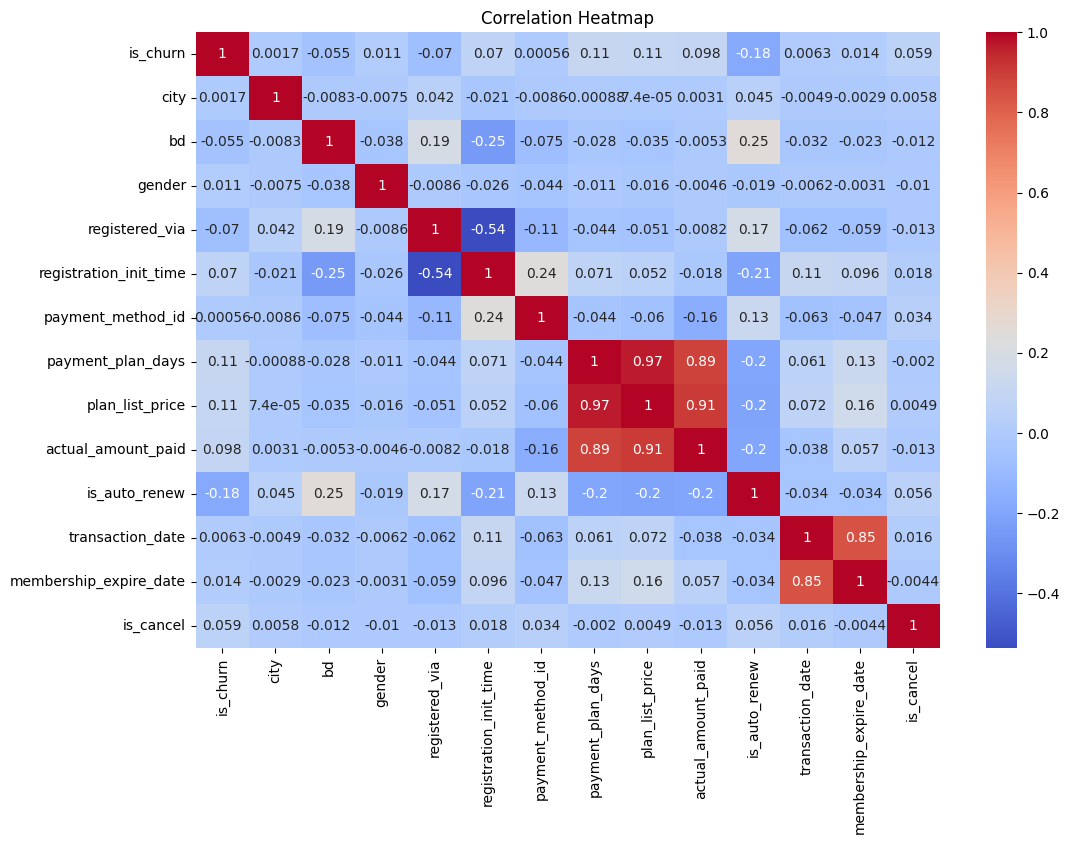

In [32]:
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Here we see that `payment_plan_days`, `actual_amount_paid`, and `plan_list_price`are almost perfectly correlated, as well as `transaction_date`, and `membership_expire_date`. This makes sense since they are all related to the customer's payment plan and related transaction dates. We'll have to be careful about multicollinearity when we select features for our models.

